In [50]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df=pd.read_csv("./readlen.stats")
# get nulls
df = pd.concat([df,pd.read_csv("./readlen.remaining.stats")],axis=0).reset_index(drop=True)
df.drop_duplicates("fp",keep="first",inplace=True)
df[df["readlen"].isnull()]["fp"].to_csv("failed.readlen.lst",header=False,index=False)
df=df[~(df["readlen"].isnull())].reset_index(drop=True)
pd.set_option('display.max_colwidth', -1)
df_many = df[df.readlen.str.contains(";")].reset_index(drop=True)
df_many.head()

,fp,readlen
0,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Adipose_Tissue/SRR2135413.cram,4833:21;8502:22;3179:23;982:24;3770:25;4060:26;440:27;1243:28;1253:29;1512:30;6965:31;4362:32;5221:33;6071:34;5062:35;5959:36;8843:37;8780:38;5550:39;4776:40;4658:41;5017:42;3105:43;3535:44;2321:45;3105:46;1625:47;3155:48;1720:49;2729:50;6822:51;7196:52;6576:53;2786:54;5777:55;6282:56;7856:57;5956:58;5076:59;4788:60;3068:61;3410:62;2620:63;2677:64;6746:65;4802:66;3592:67;2827:68;3308:69;5276:70;5612:71;14968:72;728463:75
1,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Adrenal_Gland/SRR2135339.cram,37596:21;69762:22;10813:23;7213:24;12364:25;32774:26;19474:27;12510:28;5704:29;8580:30;17775:31;6412:32;3610:33;547:34;965:35;124:36;96:37;92:38;226:39;42:40;28:41;23:42;34:43;20:44;18:45;15:46;7:47;16:48;19:49;19:50;23:51;58:52;66:53;26:54;40:55;42:56;66:57;45:58;20:59;14:60;12:61;28:62;25:63;7:64;19:65;12:66;9:67;3:68;11:69;21:70;53:71;247:72;20995:75
2,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Bladder/SRR2135407.cram,16690:21;38536:22;9196:23;7654:24;11485:25;16669:26;3662:27;4019:28;3557:29;5119:30;16742:31;12760:32;13572:33;18890:34;15157:35;15940:36;23771:37;32244:38;17904:39;10272:40;25285:41;14470:42;9845:43;6860:44;10174:45;8717:46;6425:47;8564:48;9409:49;9211:50;26656:51;21683:52;25593:53;21215:54;17923:55;22428:56;27917:57;19755:58;9029:59;16314:60;8633:61;8550:62;8019:63;6265:64;9467:65;12690:66;9454:67;5125:68;6712:69;7531:70;7444:71;20282:72;859733:75
3,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Bladder/SRR2135324.cram,7405:21;17197:22;5975:23;1868:24;7576:25;6358:26;1312:27;3466:28;4368:29;5090:30;13337:31;11019:32;9087:33;9741:34;10885:35;7680:36;13672:37;16796:38;9085:39;5581:40;9070:41;7266:42;4491:43;4989:44;3009:45;2794:46;4178:47;4693:48;4526:49;6464:50;9214:51;10529:52;11542:53;6599:54;11100:55;14366:56;12710:57;10806:58;7313:59;9300:60;6971:61;8090:62;7398:63;6795:64;13274:65;15147:66;11111:67;7753:68;6787:69;6646:70;7439:71;15786:72;702151:75
4,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Adrenal_Gland/SRR2135287.cram,17103:21;36135:22;10431:23;4652:24;11511:25;20662:26;3063:27;5404:28;6439:29;6543:30;19224:31;14034:32;13719:33;19622:34;13850:35;26459:36;41923:37;34556:38;23580:39;14439:40;20022:41;19285:42;15348:43;11458:44;7833:45;7054:46;9907:47;11094:48;9471:49;10773:50;29772:51;20335:52;18951:53;16639:54;18458:55;24133:56;24339:57;19780:58;10081:59;15294:60;9992:61;12252:62;9385:63;13363:64;13816:65;13690:66;7909:67;6593:68;8980:69;8104:70;13825:71;24700:72;1022583:75


In [52]:
df = df[~(df.readlen.str.contains(";"))].reset_index(drop=True)
df["len"] = df.readlen.str.split(":",expand=True)[1]
df["numreads"] = df.readlen.str.split(":",expand=True)[0]
df.tail()

,fp,readlen,len,numreads
9278,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Vagina/SRR1420259.cram,117822611:76,76,117822611
9279,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Vagina/SRR1475062.cram,123365217:76,76,123365217
9280,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Vagina/SRR1415529.cram,141213682:76,76,141213682
9281,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Vagina/SRR811675.cram,141018082:76,76,141018082
9282,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Vagina/SRR1420912.cram,206610843:76,76,206610843


In [53]:
lg = df[["len","numreads"]].groupby(by="len").count().reset_index()
lg.columns = ["len","num_samples"]
display(lg)
df["numreads"] = df["numreads"].astype(int)
ng = df[["len","numreads"]].groupby(by="len").sum().reset_index()
display(ng)
ng["len"] = ng["len"].astype(int)
ng["bps"] = ng["len"]*ng["numreads"]
ng

,len,num_samples
0,101,33
1,250,57
2,76,9193


,len,numreads
0,101,2672632867
1,250,11870357702
2,76,932401647154


,len,numreads,bps
0,101,2672632867,269935919567
1,250,11870357702,2967589425500
2,76,932401647154,70862525183704


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f734bc46e80>]],
      dtype=object)

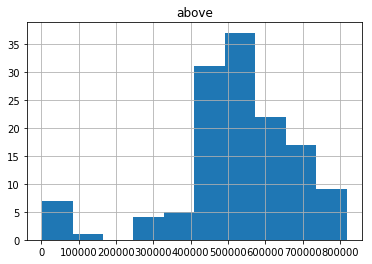

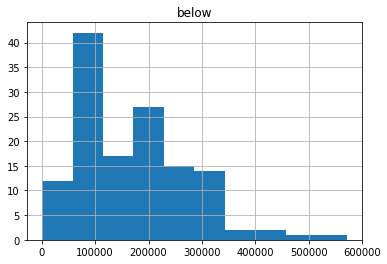

In [54]:
minlen_thresh = 50
df_many["above"] = df_many.apply(lambda row: 
        sum([int(x.split(":")[0]) if int(x.split(":")[1])>=minlen_thresh else 0 for x in row["readlen"].split(";")])/2
                                ,axis=1)
df_many["below"] = df_many.apply(lambda row: 
        sum([int(x.split(":")[0]) if int(x.split(":")[1])<minlen_thresh else 0 for x in row["readlen"].split(";")])/2
                                ,axis=1)
df_many.drop("readlen",axis=1,inplace=True)
df_many.sort_values(by="above",ascending=False,inplace=True)
df_many.reset_index(drop=True,inplace=True)
df_many.hist("above")
df_many.hist("below")

In [57]:
df_many.sort_values(by="below",ascending=True)

,fp,above,below
132,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Pituitary/SRR2135357.cram,1986.5,640.0
125,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Small_Intestine/SRR2135415.cram,139559.0,23331.0
128,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Testis/SRR2135354.cram,10340.0,34444.0
131,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Esophagus/SRR2135352.cram,2719.0,37090.0
122,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Brain/SRR2135359.cram,316015.0,40567.5
117,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Lung/SRR2135391.cram,394854.0,44728.0
121,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Colon/SRR2135416.cram,316327.5,45204.0
130,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Breast/SRR2135332.cram,6780.5,45244.5
113,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Lung/SRR2135311.cram,423531.0,47090.5
118,/ccb/salz4-4/gpertea/GTEX_align/by_tissue//Muscle/SRR2135308.cram,393086.0,49458.0
